# Black Friday Sales Exploratory Data Analysis

###  Importing all the required Libraries

In [246]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline  # for proper display of plots/graphs just below its code 
warnings.filterwarnings('ignore')  # to remove any kind of warnings

### Reading CSV file

In [247]:
data = pd.read_csv('train.csv')

### Data Exploration

In [89]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [90]:
data.info() # Checking data types of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [91]:
data.shape # checking the number of columns and rows in the data

(550068, 12)

In [92]:
data.isnull().sum() # checking the number of null values in all the different columns

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [93]:
data = data.drop(columns =['Product_Category_3'])  # droping Product_Category_3 column because it contains lots of null values
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,365


#### Modifying Dataframe Objects for Better EDA

In [94]:
data.Marital_Status.replace(1,"Married", inplace=True) 
data.Marital_Status.replace(0,"Single",inplace=True)
# Replacing 1 and 0 in the Marital_Status column with 'Married' and 'Single' respectively for better understanding 

In [95]:
data['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [96]:
data['Age'] = data['Age'].map({'0-17':'Child','18-25':'Teenage','26-35':'Adult','36-45':'Adult','46-50':'Adult','51-55':'Old','55+':'Old'})
data
# Dropping down the Age Group into 4 categories for better analysis and understanding
# Age Group 0-17 is Child Group
# Age Group 18-25 is Teenagers Group 
# Age Group 26-35 is Adult Group
# Age Group 36-45 is Adult Group
# Age Group 46-50 is Adult Group
# Age Group 51-55 is Old Group
# Age Group 55+ is Old Group

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,Child,10,A,2,Single,3,NaN,8370
1,1000001,P00248942,F,Child,10,A,2,Single,1,6.0,15200
2,1000001,P00087842,F,Child,10,A,2,Single,12,NaN,1422
3,1000001,P00085442,F,Child,10,A,2,Single,12,14.0,1057
4,1000002,P00285442,M,Old,16,C,4+,Single,8,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,Old,13,B,1,Married,20,NaN,368
550064,1006035,P00375436,F,Adult,1,C,3,Single,20,NaN,371
550065,1006036,P00375436,F,Adult,15,B,4+,Married,20,NaN,137
550066,1006038,P00375436,F,Old,1,C,2,Single,20,NaN,365


In [97]:
from statistics import mode
filt = data.groupby(['Age'])['Product_Category_2'].agg(mode) # Calculating mode of each Age Group
filt

Age
Adult      8.0
Child      4.0
Old        8.0
Teenage    8.0
Name: Product_Category_2, dtype: float64

#### Treatment of null values of Product_Category_2  column

In [98]:
data1 = data[data.Product_Category_2.isnull()]
for row in data1.itertuples():
    data.at[row.Index,'Product_Category_2'] = filt[row.Age]
# Replacing the Nan values with the mode Age of that particulat Age Group

In [191]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,Child,10,A,2,Single,3,4.0,8370
1,1000001,P00248942,F,Child,10,A,2,Single,1,6.0,15200
2,1000001,P00087842,F,Child,10,A,2,Single,12,4.0,1422
3,1000001,P00085442,F,Child,10,A,2,Single,12,14.0,1057
4,1000002,P00285442,M,Old,16,C,4+,Single,8,8.0,7969
...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,Old,13,B,1,Married,20,8.0,368
550064,1006035,P00375436,F,Adult,1,C,3,Single,20,8.0,371
550065,1006036,P00375436,F,Adult,15,B,4+,Married,20,8.0,137
550066,1006038,P00375436,F,Old,1,C,2,Single,20,8.0,365


## Visualization

<AxesSubplot:xlabel='Gender', ylabel='count'>

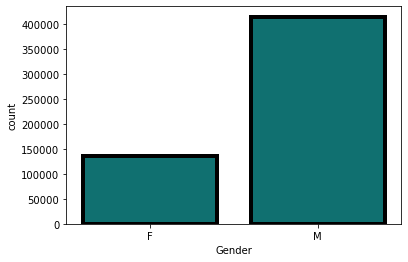

In [193]:
sns.countplot(x= 'Gender' ,  data = data, color = 'teal' , lw = 4, ec = 'black')

#### From the above graph it can be interpreted that the Males prefer to shop more than females.

<AxesSubplot:xlabel='Occupation', ylabel='count'>

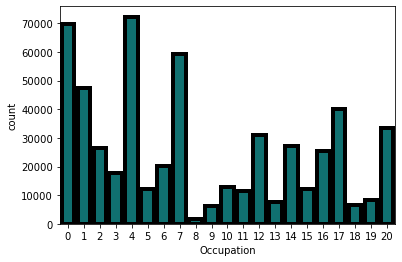

In [203]:
sns.countplot(x = 'Occupation', data =data , color = 'teal', lw = 4, ec = 'black')

#### From the above graph it can be interpreted that occupation 4, 0, and 7 have maximum tendency of shopping.

<AxesSubplot:xlabel='Age', ylabel='count'>

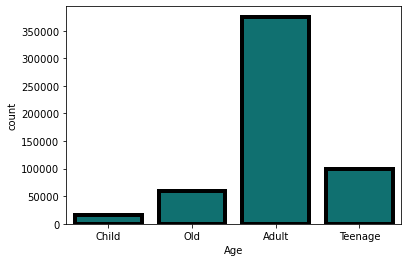

In [195]:
sns.countplot(x= 'Age' , data = data, color = 'teal' , lw = 4, ec = 'black')

#### From the above graph it can be interpreted that Adults prefer to shop more than any other age group.

<AxesSubplot:xlabel='City_Category', ylabel='count'>

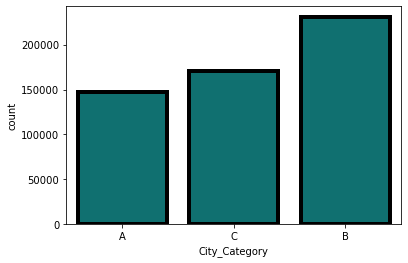

In [196]:
sns.countplot(x= 'City_Category' , data = data, color = 'teal' , lw = 4, ec = 'black')

#### From the above graph it can be interpreted that people from B City_Category are more frequent shoppers.

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

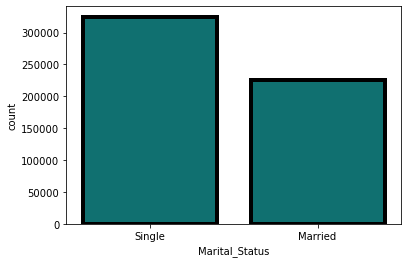

In [197]:
sns.countplot(x= 'Marital_Status' , data = data, color = 'teal' , lw = 4, ec = 'black')

#### From the above graph it can be interpreted that Singles usually shop more than married people.

<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

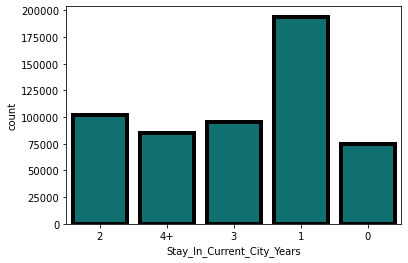

In [198]:
sns.countplot(x = 'Stay_In_Current_City_Years', data = data, color = 'teal' , lw = 4, ec = 'black')

#### From the above graph it can be interpreted that people who have lived in the city for 1 year are more frequent shoppers than people who have lived in the city for than 1 year.

### Comparison with the Purchase Column

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

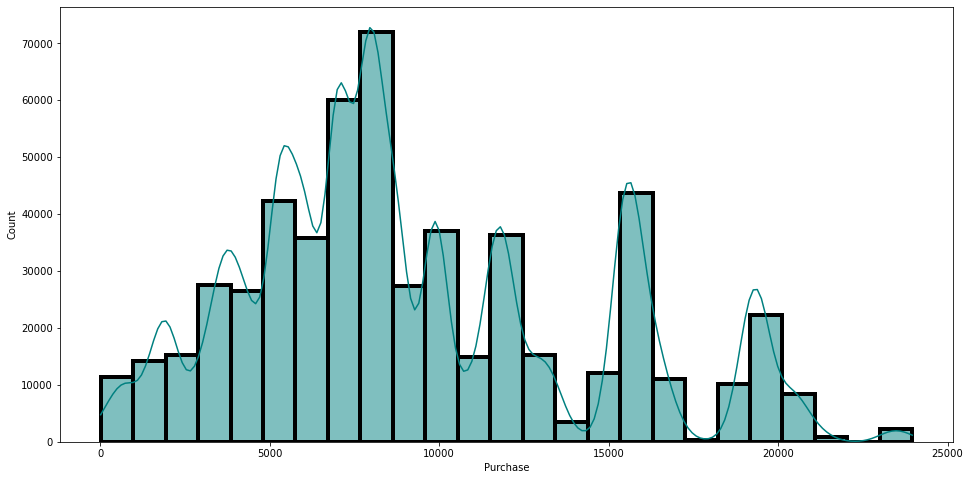

In [188]:
plt.figure(figsize=(16,8))
sns.histplot(data, x='Purchase', kde=True, bins = 25, color = 'teal', lw = 4, ec = 'black')

#### From the above graph it can be interpreted that most purchases are between the price range of 5,000 - 10,000.

Text(0.5, 1.0, 'Purchase on the basis of Age and Gender')

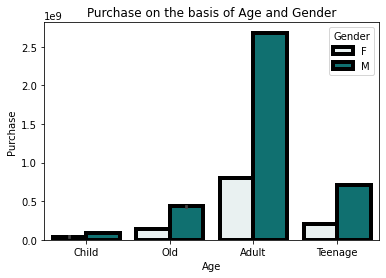

In [199]:
sns.barplot(x = 'Age', y = 'Purchase', hue = 'Gender', data = data, estimator = sum, color = 'teal' , lw = 4, ec = 'black')
plt.title("Purchase on the basis of Age and Gender")

#### From the above graph it can be interpreted that Adult Males are more frequent shoppers.

Text(0.5, 1.0, 'Purchase by Marital Status and Gender')

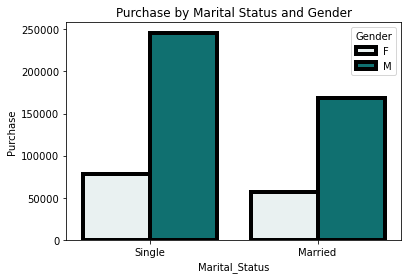

In [244]:
sns.barplot(x = 'Marital_Status', y = 'Purchase', data = data, hue = 'Gender', color = 'teal', lw = 4, ec = 'black' , estimator = np. count_nonzero)
plt.title("Purchase by Marital Status and Gender")

#### From the above graph it can be interpreted that Single Man tend to shop the most.

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

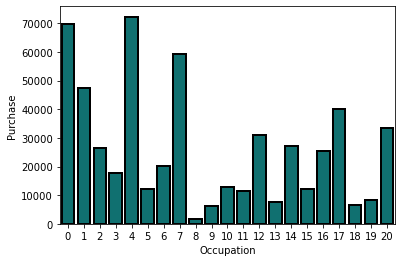

In [238]:
sns.barplot(x = 'Occupation', y = 'Purchase', data = data, color = 'teal', lw = 2, ec = 'black', ci = None, estimator = np. count_nonzero) 

#### The above graph confirms that the people of occupation 4, 0, and 7 shop the most.

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

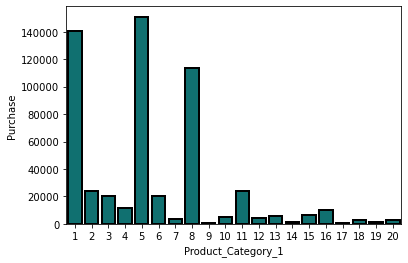

In [236]:
sns.barplot(x = 'Product_Category_1', y = 'Purchase', data = data, color = 'teal', lw = 2, ec = 'black',  estimator = np. count_nonzero)

#### From the above graph it can be seen that 'Product 5' from 'Product_Category_1' has been purchased maximum.

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

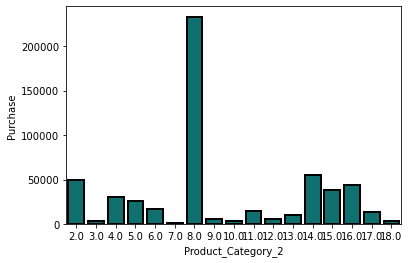

In [237]:
sns.barplot(x = 'Product_Category_2', y = 'Purchase', data = data, color = 'teal', lw = 2, ec = 'black',  estimator = np. count_nonzero)

#### From the above graph it can be seen that 'Product 8' from 'Product_Category_2' has been purchased maximum.